In [509]:
from dpks.quant_matrix import QuantMatrix
from sklearn.cluster import KMeans, AgglomerativeClustering, FeatureAgglomeration, HDBSCAN

import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.datasets import make_classification

In [558]:

# Parameters for the dataset
n_samples = 1000
n_features = 6000
n_informative = 300
n_redundant = 2700
n_noise = n_features - n_informative - n_redundant

# Create a dataset with informative, redundant, and noise features
X, y = make_classification(n_samples=n_samples, n_features=n_features, n_informative=n_informative, n_redundant=n_redundant, n_repeated=0, n_classes=2, random_state=42)


In [559]:

X = pd.DataFrame(X, columns=[f'Protein_{i+1}' for i in range(n_features)])

X

,Protein_1,Protein_2,Protein_3,Protein_4,Protein_5,Protein_6,Protein_7,Protein_8,Protein_9,Protein_10,...,Protein_5991,Protein_5992,Protein_5993,Protein_5994,Protein_5995,Protein_5996,Protein_5997,Protein_5998,Protein_5999,Protein_6000
0,-0.720145,-0.136523,-40.461406,-109.248856,103.810784,-0.540044,1.416971,-0.588231,-40.246033,1.655458,...,-221.106825,9.726619,-39.130515,-0.789347,-119.247250,-1.036178,1.905906,-87.473513,16.015282,-1.992411
1,-2.399527,0.702234,-74.985640,84.739890,-83.810286,2.996713,6.942358,1.359462,-159.934533,1.405112,...,51.355098,42.457403,-107.320033,-0.543022,44.207965,2.024081,-0.110393,34.087635,5.765313,-40.901828
2,0.731007,1.530401,-27.147500,-33.468936,-64.589034,-12.732755,90.382564,-0.555605,5.066070,0.057765,...,62.821195,-51.274817,51.973285,-1.583862,-77.475692,-0.614204,0.976255,73.492516,5.921997,20.261233
3,-0.191397,0.375753,-9.897398,39.663779,137.140014,-3.549370,157.631312,-0.521148,70.277638,1.068034,...,-75.979904,-1.715934,115.679922,-1.100545,-107.595845,0.551724,-0.667333,-31.644541,109.669975,-62.294954
4,-0.153264,-0.808325,201.386328,180.704645,-18.642598,5.358524,-47.785592,0.543664,126.370505,-1.896523,...,32.197267,146.650693,-5.892265,-0.572929,75.900515,1.600956,-1.056038,-162.079421,-19.905827,-2.031665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.896930,0.626110,12.269753,-97.901585,171.384761,6.910425,14.437800,0.123923,-91.341956,0.275995,...,-5.966212,154.854281,37.518981,0.339498,-6.355765,-0.854729,0.536790,-86.215268,-10.360593,210.495865
996,-1.706699,-1.404538,176.833806,18.242808,103.297302,-8.955504,-11.125940,1.787383,-10.249985,-0.536903,...,-105.548378,-96.565259,27.428422,-0.385605,-100.196570,0.318557,-0.431371,33.643249,-22.250077,155.084290
997,-0.815098,-0.709124,102.864358,-68.449866,136.050249,-1.816844,-59.806210,-0.432163,89.095871,-1.815506,...,-99.559336,-108.814950,132.492423,1.145322,53.550831,-0.052492,-0.443548,-68.771478,116.170251,-98.578707
998,0.752500,1.554944,-180.058273,-76.725211,273.459807,-9.983455,87.670905,0.972681,-6.422483,0.024496,...,83.655960,-69.699170,-122.732265,2.054165,42.905618,2.002522,0.539493,-206.217854,-95.493368,-121.233705


In [560]:
from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
#
# X[:] = scaler.fit_transform(X[:])

In [561]:
from sklearn.decomposition import PCA

from umap import UMAP

pca = UMAP(n_components=2)

pca.fit(X)

components = pca.transform(X)

In [562]:
components = np.concatenate((y.reshape((-1, 1)), components), axis=1)

<Axes: xlabel='PC1', ylabel='PC2'>

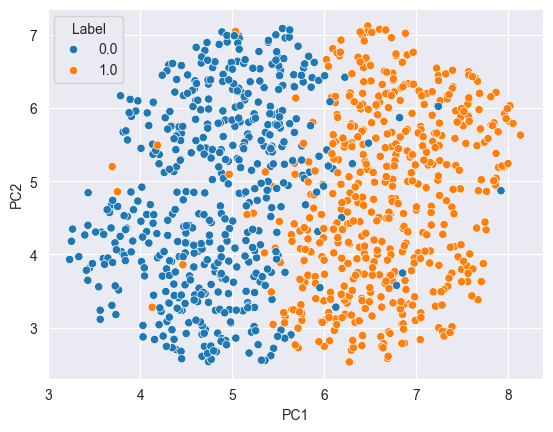

In [563]:
components = pd.DataFrame(components, columns=['Label', 'PC1', 'PC2'])

sns.scatterplot(
    data=components,
    x='PC1',
    y='PC2',
    hue='Label',
)

In [566]:
from sklearn.ensemble import HistGradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression, Lasso, SGDClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
#import xgboost

# clf = xgboost.XGBClassifier(
#     #max_depth=10,
#     n_jobs=1,
#     #subsample=0.5,
#     #reg_lambda=2,
#     # objective="binary:logitraw",
#     # seed=42,
#     # eval_metric="logloss",
# )
# clf = HistGradientBoostingClassifier()
clf = LogisticRegression(
    n_jobs=1,
    max_iter=1000,
)
#clf = SVC(kernel="linear")
#clf = RandomForestClassifier()
#clf = Lasso()
#clf = AdaBoostClassifier()
#clf = SGDClassifier()

clf.fit(X[:], y)

LogisticRegression(max_iter=1000, n_jobs=1)

In [567]:
from sklearn.model_selection import cross_val_score

cross_val_score(clf, X, y, scoring='roc_auc', cv=5, n_jobs=1)

array([0.75157516, 0.76247625, 0.71977198, 0.7853    , 0.7834    ])

In [568]:
from sklearn.inspection import permutation_importance


importances = permutation_importance(
    clf,
    X,
    y,
    scoring="neg_log_loss",
    n_jobs=1,
    #max_samples=0.5,
    n_repeats=3,
)

KeyboardInterrupt: 

In [553]:
importances['importances_mean'].shape

(50,)

In [554]:
feature_importances = pd.DataFrame(
    {
        "feature": X.columns,
        "importance": importances['importances_mean']
    }
)

In [555]:
feature_importances.sort_values("importance", ascending=False)

,feature,importance
39,Protein_40,0.124976
23,Protein_24,0.080625
25,Protein_26,0.042245
29,Protein_30,0.040985
38,Protein_39,0.023418
24,Protein_25,0.022078
44,Protein_45,0.020784
19,Protein_20,0.020329
49,Protein_50,0.003756
47,Protein_48,0.003752


In [556]:
feature_importances['feature'] = feature_importances['feature'].astype(str)

<Axes: xlabel='importance', ylabel='feature'>

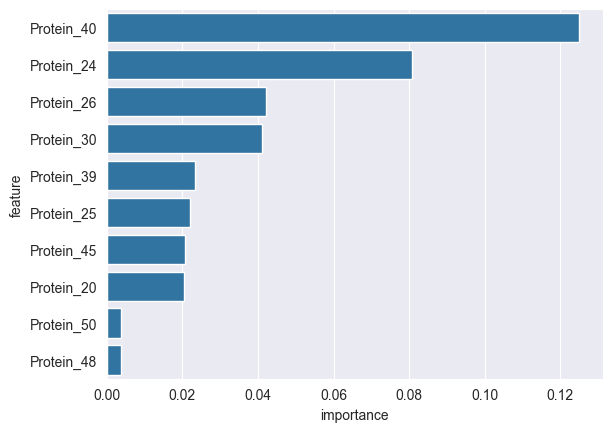

In [557]:
sns.barplot(x="importance", y="feature", data=feature_importances.sort_values("importance", ascending=False).head(10))

In [445]:
from dpks.interpretation import FeatureImportance

importance_calculator = FeatureImportance(
    n_iterations=3,
    feature_names=X.columns.values,
)

importance_calculator.fit(clf, X.values)

/Users/aaron/miniconda3/envs/DPKS-3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/aaron/miniconda3/envs/DPKS-3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/aaron/miniconda3/envs/DPKS-3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/aaron/miniconda3/envs/DPKS-3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/aaron/miniconda3/envs/DPKS-3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression wa

In [446]:
feature_importances['loss_importance'] = importance_calculator.global_explanations

<Axes: xlabel='loss_importance', ylabel='feature'>

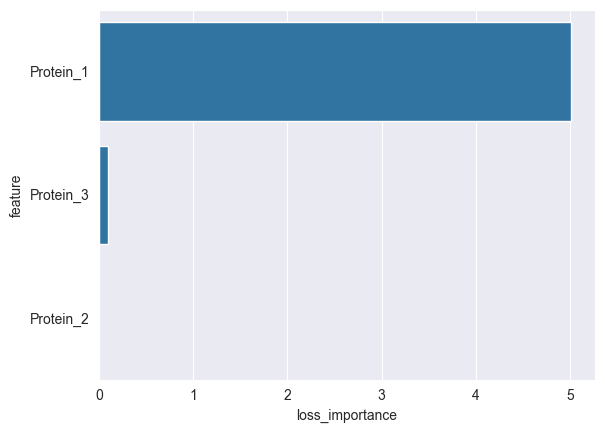

In [447]:
sns.barplot(
    data=feature_importances.sort_values("loss_importance", ascending=False).head(20),
    x="loss_importance",
    y="feature"
)

In [448]:
import shap

In [449]:
explainer = shap.LinearExplainer(clf, X)
#explainer = shap.TreeExplainer(clf)
#explainer = shap.Explainer(clf)
shap_values = explainer(X)

In [450]:
feature_importances['shap_importance'] = np.mean(abs(shap_values.values), axis=0)

In [451]:
feature_importances.sort_values("shap_importance", ascending=False)

,feature,importance,loss_importance,shap_importance
0,Protein_1,2.289932,5.015527,4.729774
2,Protein_3,0.000377,0.100169,0.089694
1,Protein_2,0.000002,0.000947,0.000823


<Axes: xlabel='shap_importance', ylabel='feature'>

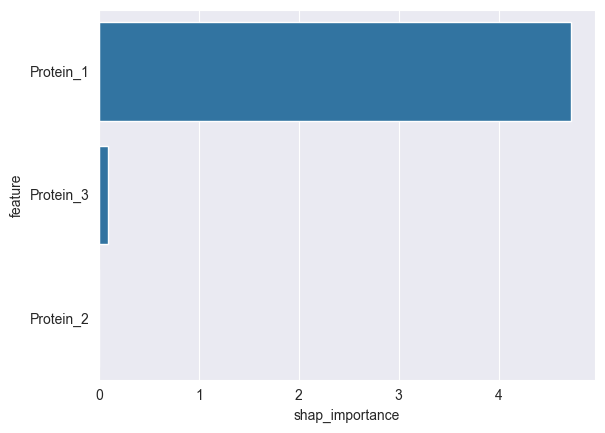

In [452]:
sns.barplot(
    data=feature_importances.sort_values("shap_importance", ascending=False).head(20),
    x="shap_importance",
    y="feature"
)

<Axes: xlabel='shap_importance', ylabel='loss_importance'>

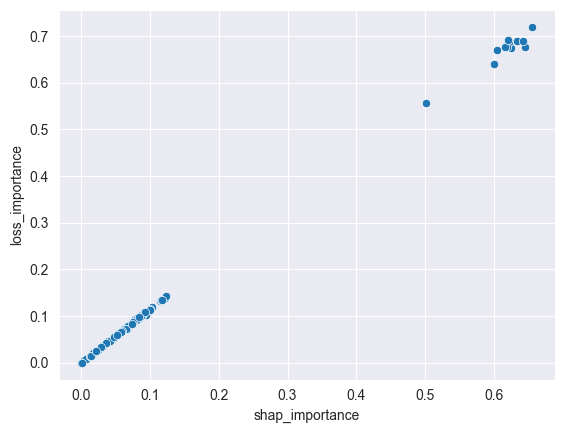

In [353]:
sns.scatterplot(
    data=feature_importances,
    x="shap_importance",
    y="loss_importance",
)

<Axes: xlabel='importance', ylabel='loss_importance'>

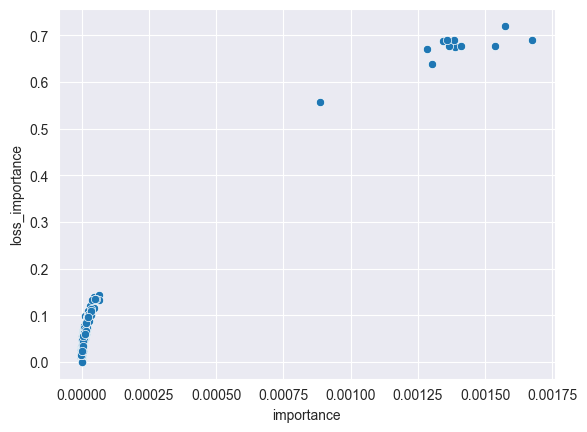

In [354]:
sns.scatterplot(
    data=feature_importances,
    x="importance",
    y="loss_importance",
)

<Axes: xlabel='importance', ylabel='shap_importance'>

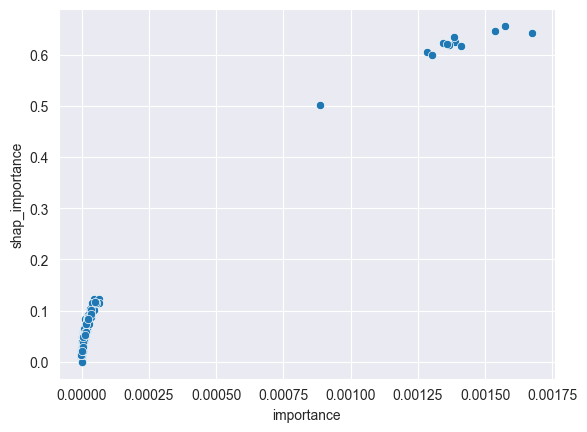

In [355]:
sns.scatterplot(
    data=feature_importances,
    x="importance",
    y="shap_importance",
)